In [1]:
repo = "http://cran.us.r-project.org"
library(caret)
library(ggfortify)
library(ggplot2)
library(dplyr)
library(RSQLite)
library(DBI)
library(class)
library(randomForest)

Warning message:
"package 'caret' was built under R version 3.3.3"Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'ggfortify' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'RSQLite' was built under R version 3.3.3"Warning message:
"package 'DBI' was built under R version 3.3.3"Warning message:
"package 'randomForest' was built under R version 3.3.3"randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine

The following object is masked from 'package:ggplot2':

    margin



In [2]:
remove_cols= function(l, cols){
    return(l[! l %in% cols])
}

In [3]:
base_dir<- "C:/Users/Jeff/Documents/research/Sadler_3rdPaper/manuscript/"
data_dir<- "C:/Users/Jeff/Google Drive/research/Sadler_3rdPaper_Data/"
fig_dir <- paste(base_dir, "Figures/general/", sep="")
db_filename <- "floodData.sqlite"

In [4]:
con = dbConnect(RSQLite::SQLite(), dbname=paste(data_dir, db_filename, sep=""))

In [5]:
df = dbReadTable(con, 'for_model_avgs')

In [6]:
colnames(df)


[1] "event_date"  "event_name"  "num_flooded" "WDF2"        "WSF2"       
 [6] "AWDR"        "AWND"        "WGF6"        "WSF6"        "WDF6"       
[11] "ht"          "hht"         "lt"          "llt"         "r15"        
[16] "rhr"         "td_av"       "gw_av"       "r15mx"       "rhrmx"      
[21] "rd"          "r3d"

In [7]:
cols_to_remove = c('event_name', 'event_date', 'num_flooded')
in_col_names = remove_cols(colnames(df), cols_to_remove)
# in_col_names = c('td_av', 'llt')
out_col_name = 'num_flooded'

In [8]:
model_data = df[, append(in_col_names, out_col_name)]
nrow(model_data)
model_data = na.omit(model_data)
model_data = model_data[model_data[,'rd']>0.01,]
nrow(model_data)
model_data


[1] 2172

[1] 814

,WDF2,WSF2,AWDR,AWND,WGF6,WSF6,WDF6,ht,hht,lt,llt,r15,rhr,td_av,gw_av,r15mx,rhrmx,rd,r3d,num_flooded
1,121.66667,25.96667,291.66667,12.100000,12.100000,12.100000,291.66667,3.21050,3.61750,1.18600,0.53300,0.9729583,1.0587361,1.452974306,4.3406990,0.60500000,1.32250000,7.73250000,3.518000e+00,101
2,205.00000,15.00000,213.00000,2.700000,2.700000,2.700000,213.00000,0.66100,0.86100,-1.13000,-1.22350,-0.0140303,0.1098788,-0.202139583,2.2083260,0.03000000,0.07000000,0.22750000,4.500000e-02,2
3,158.75000,27.12500,133.00000,14.350000,13.953947,8.564103,133.61137,2.23750,4.96800,2.69850,-0.69250,2.2532500,2.4728611,1.095752604,2.3340485,0.35000000,1.10125000,6.29416667,3.080000e-01,110
4,48.09839,30.93389,123.00000,23.900000,20.061461,11.923954,110.73012,5.22800,5.57600,3.28400,1.58100,3.2158819,3.0279514,2.749343750,2.9984932,0.14000000,0.42625000,4.80583333,3.410000e-01,105
5,38.76321,25.98768,25.66667,21.183333,15.315069,8.769403,41.51250,3.49250,4.21250,2.08300,1.08450,2.6816875,2.8765764,2.244864583,2.1418366,0.37500000,0.80000000,3.67166667,9.240000e-01,36
6,205.55543,16.63738,213.00000,8.050000,9.721000,6.620833,222.54583,1.84200,2.63900,-0.98425,-0.98425,0.5756914,1.0167284,0.560302083,3.6207730,0.49888889,1.41333333,2.92333333,1.272727e-02,35
7,181.73207,12.57018,192.00000,9.250000,8.440377,5.730628,194.67782,1.04650,1.80950,-0.88900,-1.01400,0.3183000,0.3335333,0.306097917,2.3629127,0.01555556,0.01888889,0.01666667,2.727273e-03,1
8,160.62590,15.70444,138.00000,7.725000,7.648271,5.100042,201.54375,1.85100,2.11200,-0.74300,-0.76450,1.0789506,1.0209012,0.581873958,2.4327142,0.55666667,0.86111111,0.74750000,2.727273e-03,5
9,235.81490,19.83450,263.50000,13.600000,13.990583,8.885667,216.27292,1.83550,2.14250,0.66950,0.01800,0.9701358,1.0293210,0.668728125,2.1625958,0.22333333,0.38333333,1.03916667,1.363636e-02,8
10,250.19680,25.31077,218.00000,10.850000,10.333042,6.774792,225.89167,0.38750,1.35500,-1.76125,-1.76125,0.7570617,0.9575432,-0.288447917,0.7108298,0.46333333,0.90666667,1.36750000,2.727273e-03,2


In [9]:
prt = createDataPartition(model_data[, out_col_name], p=0.7)

In [10]:
train_data = model_data[prt$Resample1,]
train_in_data = model_data[prt$Resample1, in_col_names]
train_out_data = model_data[prt$Resample1, out_col_name]
test_in_data = model_data[-prt$Resample1, in_col_names]
test_out_data = model_data[-prt$Resample1, out_col_name]

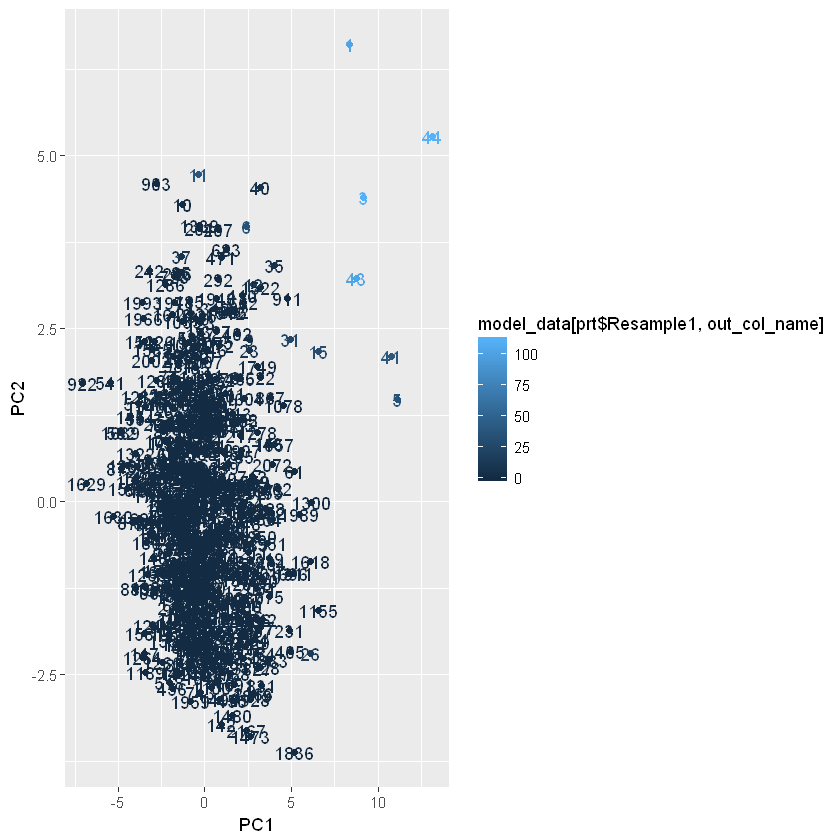

In [11]:
train_col_stds = apply(train_in_data, 2, sd)
train_col_means = colMeans(train_in_data)

train_normalized = t((t(train_in_data)-train_col_means)/train_col_stds)
test_normalized = t((t(test_in_data)-train_col_means)/train_col_stds)

pca = prcomp(train_normalized)
pca$x = -pca$x
pca$rotation=-pca$rotation
p = ggplot(pca$x[,c(1,2)], aes(x=PC1, y=PC2, colour=model_data[prt$Resample1, out_col_name], label=rownames(pca$x)))
p + geom_point() + geom_text()

In [12]:
trn_preprocessed = predict(pca, train_normalized)
tst_preprocessed = predict(pca, test_normalized)

In [13]:
# train_data = cbind(as.data.frame(trn_preprocessed), num_flooded = model_data[prt$Resample1, out_col_name])

In [14]:
fmla = as.formula(paste(out_col_name, "~", paste(in_col_names, collapse="+")))
fmla

num_flooded ~ WDF2 + WSF2 + AWDR + AWND + WGF6 + WSF6 + WDF6 + 
    ht + hht + lt + llt + r15 + rhr + td_av + gw_av + r15mx + 
    rhrmx + rd + r3d

In [15]:
output = randomForest(fmla, data=train_data, importance = TRUE)

In [16]:
summary(output)

                Length Class  Mode     
call              4    -none- call     
type              1    -none- character
predicted       570    -none- numeric  
mse             500    -none- numeric  
rsq             500    -none- numeric  
oob.times       570    -none- numeric  
importance       38    -none- numeric  
importanceSD     19    -none- numeric  
localImportance   0    -none- NULL     
proximity         0    -none- NULL     
ntree             1    -none- numeric  
mtry              1    -none- numeric  
forest           11    -none- list     
coefs             0    -none- NULL     
y               570    -none- numeric  
test              0    -none- NULL     
inbag             0    -none- NULL     
terms             3    terms  call     

## Train Data evaluation

In [17]:
train_fld = train_out_data[train_out_data>0]
pred_trn = predict(output, newdata = as.data.frame(train_in_data), type='response')
pred_trn_capped = replace(pred_trn, pred_trn > 159, 159)
pred_trn_fld = pred_trn_capped[model_data[prt$Resample1, out_col_name]>0]

In [18]:
mean(abs(pred_trn_capped - train_out_data))
mean(abs(train_fld - pred_trn_fld))

[1] 0.4032441

[1] 6.252382

In [19]:
max_val = max(max(train_fld), max(pred_trn_fld))

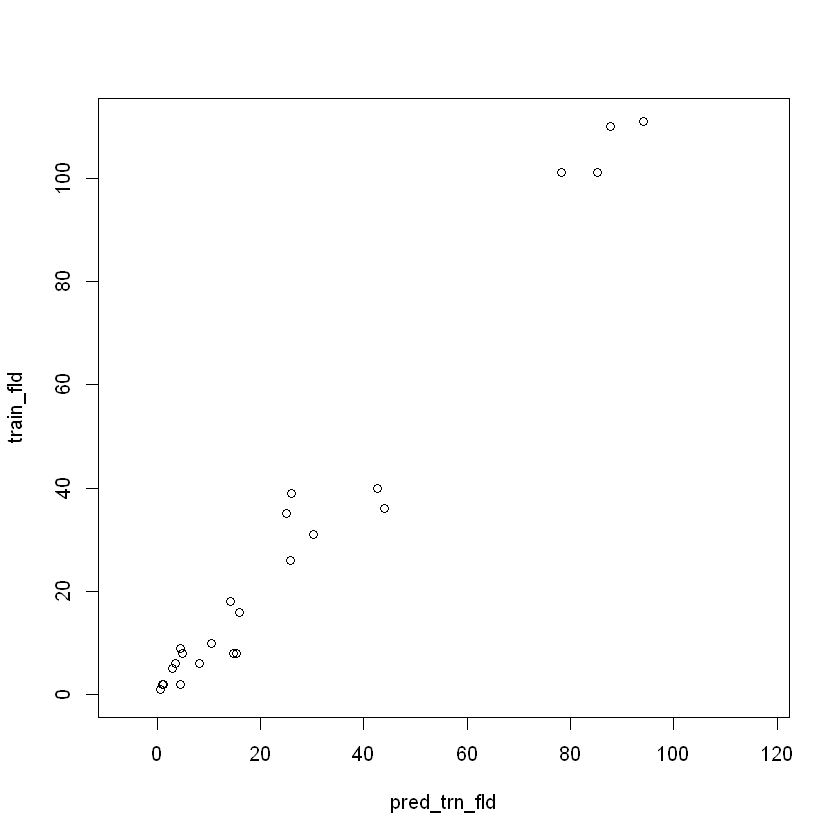

In [20]:
plot(pred_trn_fld, train_fld, asp=1, ylim=c(0,max_val), xlim=c(0,max_val))

## Test data

In [21]:
test_out_data
test_fld = test_out_data[test_out_data>0]
pred = predict(output, newdata = as.data.frame(test_in_data), type='response')
max(pred)
pred_capped = replace(pred, pred > 159, 159)
pred_fld = pred_capped[model_data[-prt$Resample1, out_col_name]>0]
pred_capped

[1] 105   1   1   5   3   1   2   4  10   7   1 159   1   3   5   1  11   0
 [19]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [37]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [55]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [73]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
 [91]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[109]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[127]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[145]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[163]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[181]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[199]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[217]   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
[235]   0   0   0   0   0   0   0   0   0   0

[1] 72.81487

4             7            13            14            16 
 5.469683e+01 -2.678746e-15  1.416167e+00  6.922667e-01 -2.890133e-15 
           17            18            20            21            22 
 1.012167e+00  8.454433e+00  8.594033e+00  1.633477e+01  1.372783e+01 
           24            27            28            29            32 
 6.800000e-02  7.281487e+01 -3.027356e-15  4.066667e-02  2.236600e+01 
           33            42            58            59            71 
 1.812000e-01  2.128470e+01  2.080000e-02  3.873333e-02  8.094000e-01 
           91           104           146           150           159 
-3.094858e-15  3.080000e-02  5.982000e-01 -2.774669e-15  6.733333e-02 
          165           166           173           188           223 
 2.626667e-02  1.881333e-01  1.679333e-01  8.133333e-03  1.400000e-02 
          228           238           243           254           282 
 5.400000e-02  4.000000e-03  4.700000e-02  9.434667e-01  1.000000e-02 
          286           326           328           333           338 
 1.398667e-01  3.863000e-01 -2.360334e-15  1.528867e+00  3.633000e-01 
          352           354           373           375           392 
 6.440000e-02  2.070633e+00  1.556667e-01  2.000000e-03  2.400000e-02 
          395           411           412           414           436 
-3.097522e-15  2.217333e-01 -2.721379e-15  7.000000e-02  1.936000e-01 
          445           446           449           477           494 
 1.000000e-03  2.002620e+01  4.588000e-01  1.360000e-02  1.000000e-03 
          495           499           521           527           529 
-2.930545e-15 -2.506884e-15  1.316667e-02  7.686667e-02 -2.949641e-15 
          542           548           551           564           593 
 5.826667e-02  4.900000e-02  2.400000e-02 -2.636558e-15  2.000000e-03 
          600           605           619           620           628 
 1.381333e-01 -2.946088e-15  2.000000e-02 -2.203127e-15  4.000000e-03 
          641           645           650           654           660 
 1.900000e-02  1.110533e+00  8.640000e-02 -3.220535e-15  6.136667e-01 
          666           690           691           697           702 
 6.573800e+00  5.666667e-03  4.500000e-03 -2.831957e-15  4.333333e-01 
          717           718           729           747           750 
 6.000000e-03  9.918333e-01  2.585333e-01  2.600000e-02  2.679100e+00 
          758           762           772           782           785 
-3.151701e-15 -2.938094e-15 -3.135714e-15  2.560000e-02  2.000000e-03 
          791           792           793           798           809 
 4.042667e-01  4.033333e-02 -2.864375e-15  1.155567e+00 -3.034906e-15 
          818           826           838           850           854 
 9.793533e+00  2.000000e-02  8.000000e-04 -2.981615e-15  1.070000e-02 
          876           881           888           898           920 
 1.480000e-02 -2.661871e-15  2.566667e-02  2.000000e-03  1.600000e-02 
          925           929           937           939           947 
 2.233333e-02 -2.842615e-15  1.975360e+01  1.977067e+00  4.560000e-02 
          950           965           984           996           998 
 2.600000e-02 -2.914113e-15  4.000000e-03 -2.474021e-15  2.000000e-02 
         1000          1010          1011          1015          1021 
 5.000000e-04  1.947667e-01 -3.122391e-15  7.270000e-02  7.600000e-02 
         1030          1055          1056          1065          1069 
 2.640000e-01  3.743000e-01  7.000000e-03 -2.804423e-15 -2.839506e-15 
         1094          1095          1106          1108          1112 
 3.108967e+00 -2.947420e-15 -3.070433e-15 -2.992273e-15  6.730000e-02 
         1113          1115          1121          1136          1152 
 1.600000e-02  6.833333e-03 -3.214762e-15 -2.050360e-15  1.608000e-01 
         1154          1157          1158          1159          1174 
 2.400000e-02  4.690333e-01 -3.039791e-15  1.600000e-02  4.206667e-02 
         1175          1195         

In [22]:
sort(pred_capped)

2031          1676          1760          2095          1403 
-3.318235e-15 -3.290257e-15 -3.272049e-15 -3.224976e-15 -3.224088e-15 
          654          1121          1686          1912          2035 
-3.220535e-15 -3.214762e-15 -3.189005e-15 -3.184564e-15 -3.155698e-15 
         2070           758          1965          1377           772 
-3.153477e-15 -3.151701e-15 -3.149925e-15 -3.138823e-15 -3.135714e-15 
         1011          1776           395            91          1106 
-3.122391e-15 -3.105516e-15 -3.097522e-15 -3.094858e-15 -3.070433e-15 
         1766          1158          1441           809          1376 
-3.043787e-15 -3.039791e-15 -3.039347e-15 -3.034906e-15 -3.028688e-15 
           28          1716          2038          1108          1861 
-3.027356e-15 -3.024692e-15 -3.016254e-15 -2.992273e-15 -2.991829e-15 
         2119           850          1450           529          1095 
-2.982947e-15 -2.981615e-15 -2.978950e-15 -2.949641e-15 -2.947420e-15 
          605           762          1785           495          1780 
-2.946088e-15 -2.938094e-15 -2.932765e-15 -2.930545e-15 -2.918998e-15 
          965          1996          1487            16          1982 
-2.914113e-15 -2.910117e-15 -2.894573e-15 -2.890133e-15 -2.882139e-15 
         1757           793          1990           929          1069 
-2.878142e-15 -2.864375e-15 -2.860823e-15 -2.842615e-15 -2.839506e-15 
          697          1065          1864           150          1980 
-2.831957e-15 -2.804423e-15 -2.791101e-15 -2.774669e-15 -2.740030e-15 
          412          1964             7           881          1869 
-2.721379e-15 -2.697398e-15 -2.678746e-15 -2.661871e-15 -2.654765e-15 
          564          1299           499          1591           996 
-2.636558e-15 -2.570388e-15 -2.506884e-15 -2.497114e-15 -2.474021e-15 
         1195          1804           328          1827          1821 
-2.450928e-15 -2.388756e-15 -2.360334e-15 -2.333689e-15 -2.235101e-15 
          620          1136          1000           838           494 
-2.203127e-15 -2.050360e-15  5.000000e-04  8.000000e-04  1.000000e-03 
          445          1270          1705           785           375 
 1.000000e-03  1.466667e-03  2.000000e-03  2.000000e-03  2.000000e-03 
         2078           593           898          1803          1353 
 2.000000e-03  2.000000e-03  2.000000e-03  2.000000e-03  3.200000e-03 
         1237          1519           238          1316          1389 
 3.200000e-03  3.400000e-03  4.000000e-03  4.000000e-03  4.000000e-03 
         1402          1382           628           984           691 
 4.000000e-03  4.000000e-03  4.000000e-03  4.000000e-03  4.500000e-03 
         2062          1929           690          2091           717 
 4.666667e-03  4.666667e-03  5.666667e-03  5.800000e-03  6.000000e-03 
         1891          1115          1056           188          1700 
 6.400000e-03  6.833333e-03  7.000000e-03  8.133333e-03  8.333333e-03 
         1723          1545          1674           282          1607 
 9.066667e-03  9.666667e-03  1.000000e-02  1.000000e-02  1.063333e-02 
          854          1648          1277          1632          1892 
 1.070000e-02  1.120000e-02  1.140000e-02  1.200000e-02  1.266667e-02 
          521           477           223          1305           876 
 1.316667e-02  1.360000e-02  1.400000e-02  1.416667e-02  1.480000e-02 
         1113          1159           920          1825          1531 
 1.600000e-02  1.600000e-02  1.600000e-02  1.600000e-02  1.800000e-02 
          641           998           826           619          2088 
 1.900000e-02  2.000000e-02  2.000000e-02  2.000000e-02  2.066667e-02 
           58          1175           925          2132           392 
 2.080000e-02  2.200000e-02  2.233333e-02  2.400000e-02  2.400000e-02 
          551          1154          1613           782           888 
 2.400000e-02  2.400000e-02  2.400000e-02  2.560000e-02  2.566667e-02 
          747           950      

In [23]:
mean(abs(pred_capped - test_out_data)^2)
mean(abs(test_fld - pred_fld))

[1] 49.97084

[1] 11.92331

In [24]:
max_val = max(max(test_fld), max(pred_fld))

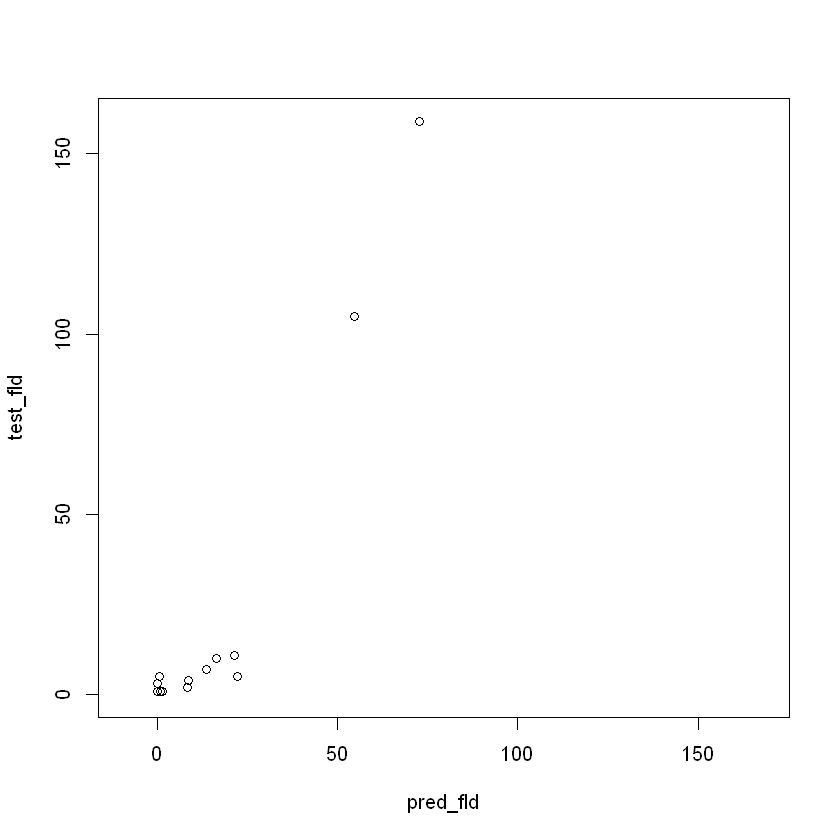

In [25]:
plot(pred_fld, test_fld, asp=1, ylim=c(0,max_val), xlim=c(0,max_val))

In [26]:
impo = as.data.frame(output$importance)
par(las=2)

ERROR: Error in parse(text = x, srcfile = src): <text>:4:0: unexpected end of input
2: par(las=2)
3: barplot(, names.arg=rownames(impo), ylim = c(0, 70)
  ^


In [ ]:
data.frame()